# Data Cleaning

https://www.kaggle.com/datasets/sagarkarar/nonface-and-face-dataset

https://www.kaggle.com/datasets/atulanandjha/lfwpeople/code

In [1]:
import os
import numpy as np
import cv2
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import zipfile
import imageio
from IPython.display import FileLink
import shutil

# Define directories
extracted_dir_human = 'human_face1'
extracted_dir_non_human = 'non_human'

# Collect all images from the human face dataset
human_face_paths = glob(os.path.join(extracted_dir_human, '**', '*.jpg'), recursive=True)

# Collect all images from the non-human face dataset with different formats
non_human_paths = []
non_human_extensions = ['*.jpg', '*.png', '*.bmp']
for ext in non_human_extensions:
    non_human_paths.extend(glob(os.path.join(extracted_dir_non_human, '**', ext), recursive=True))

# Check the dimensions of one human face image
sample_human_face_image = img_to_array(load_img(human_face_paths[0]))
human_face_img_height, human_face_img_width, _ = sample_human_face_image.shape
print(f"Human face image size: {human_face_img_width}x{human_face_img_height}")

2024-05-29 00:25:13.166950: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Human face image size: 250x250


In [2]:
# Function to resize and crop images
def resize_and_crop(image, target_size):
    h, w, _ = image.shape
    target_h, target_w = target_size
    
    # Resize the image maintaining aspect ratio
    if h > w:
        scale = target_w / w
        resized_image = cv2.resize(image, (target_w, int(h * scale)))
    else:
        scale = target_h / h
        resized_image = cv2.resize(image, (int(w * scale), target_h))
    
    # Crop the image to the target size
    h, w, _ = resized_image.shape
    start_x = (w - target_w) // 2
    start_y = (h - target_h) // 2
    cropped_image = resized_image[start_y:start_y + target_h, start_x:start_x + target_w]
    
    return cropped_image

In [3]:
# Load, resize, and crop human face images
human_face_images = []
for path in human_face_paths:
    try:
        img = img_to_array(load_img(path))
        resized_cropped_img = resize_and_crop(img, (human_face_img_height, human_face_img_width))
        human_face_images.append(resized_cropped_img)
    except Exception as e:
        print(f"Error loading {path}: {e}")


In [4]:
# Load, resize, and crop non-human face images
non_human_images = []
for path in non_human_paths:
    try:
        img = img_to_array(load_img(path))
        resized_cropped_img = resize_and_crop(img, (human_face_img_height, human_face_img_width))
        non_human_images.append(resized_cropped_img)
    except Exception as e:
        print(f"Error loading {path}: {e}")

In [5]:
# Convert lists to numpy arrays
human_face_images = np.array(human_face_images)
non_human_images = np.array(non_human_images)

# Check shapes of the resulting arrays
print(f"Number of human face images: {len(human_face_images)}")
print(f"Number of non-human images: {len(non_human_images)}")
print(f"Shape of one human face image: {human_face_images[0].shape}")
print(f"Shape of one non-human image: {non_human_images[0].shape}")

Number of human face images: 1468
Number of non-human images: 1317
Shape of one human face image: (250, 250, 3)
Shape of one non-human image: (250, 250, 3)


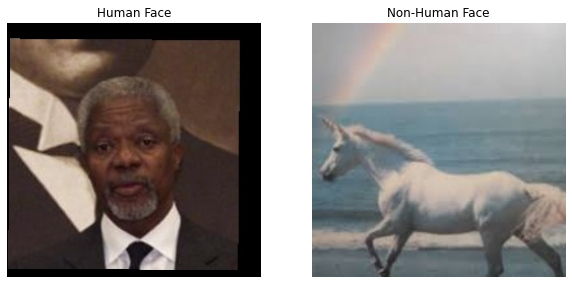

In [6]:
# Display sample images from both classes
plt.figure(figsize=(10, 5))

# Display a human face image
plt.subplot(1, 2, 1)
plt.imshow(human_face_images[100].astype('uint8'))
plt.title('Human Face')
plt.axis('off')

# Display a non-human face image
plt.subplot(1, 2, 2)
plt.imshow(non_human_images[100].astype('uint8'))
plt.title('Non-Human Face')
plt.axis('off')

plt.show()

In [8]:
# Create a directory to save the images temporarily
os.makedirs('temp_human_faces', exist_ok=True)
os.makedirs('temp_non_human_faces', exist_ok=True)

# Save human face images as jpg
for i, img in enumerate(human_face_images):
    img_path = f'temp_human_faces/human_face_{i}.jpg'
    imageio.imwrite(img_path, img.astype('uint8'))

# Save non-human face images as jpg
for i, img in enumerate(non_human_images):
    img_path = f'temp_non_human_faces/non_human_face_{i}.jpg'
    imageio.imwrite(img_path, img.astype('uint8'))

# Function to zip a directory
def zip_dir(directory, zip_filename):
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(directory):
            for file in files:
                zipf.write(os.path.join(root, file),
                           os.path.relpath(os.path.join(root, file), os.path.join(directory, '..')))

# Zip the directories
zip_dir('temp_human_faces', 'cleaned_human_faces.zip')
zip_dir('temp_non_human_faces', 'cleaned_non_human_faces.zip')

# Remove the temporary directories
shutil.rmtree('temp_human_faces')
shutil.rmtree('temp_non_human_faces')

# Display links to download the files
display(FileLink('cleaned_human_faces.zip'))
display(FileLink('cleaned_non_human_faces.zip'))


/home/znebieri/private/ECE 285/Project/cleaned_human_faces.zip

/home/znebieri/private/ECE 285/Project/cleaned_non_human_faces.zip